# Passos previs

## Importar

In [1]:
import csv
import pandas as pd
import numpy as np
import mglearn
import seaborn as sns
import locale
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import re
%matplotlib inline
matplotlib.style.use('ggplot')
## modificar tamany figura
from matplotlib.pyplot import figure
from math import sqrt
from statistics import mean 

import os

## feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


## Train & test
from sklearn.model_selection import train_test_split


## errors

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Decision tree
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
## plot DT
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## Random forest
from sklearn.ensemble import RandomForestRegressor

## Escalar
from sklearn.preprocessing import MinMaxScaler

## KNN
from sklearn import neighbors

## XGBoost
import xgboost as xgb
from xgboost import plot_importance


## Hyperpar tuning
from sklearn.model_selection import GridSearchCV

## Cross-Validation
from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Funcions

In [2]:
def creating_model_XGB(model,X_train,Y_train,X_test,Y_test,eval_metric,early):
    # Training
    model.fit(X_train, Y_train,eval_set=[(X_train, Y_train),(X_test, Y_test)],
             eval_metric=eval_metric,verbose=True,early_stopping_rounds=early) 


    # Performance
    evals_result = model.evals_result()
    epochs = len(evals_result['validation_0'][eval_metric])
    x_axis = range(0, epochs)


    plt.plot(x_axis, evals_result['validation_0'][eval_metric], label='Train')
    plt.plot(x_axis, evals_result['validation_1'][eval_metric], label='Test')
    plt.legend(),plt.ylabel('RMSE'),plt.title('XGBoost RMSE Train VS Test')
    plt.show()


    
def plot_feat_imp(model, number,predictors):
    feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)


    feat_imp = feat_imp[0:number]
    name = []
    for i in feat_imp.index.tolist():
        name.append(predictors[i])


    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.xticks(range(0, len(feat_imp)),name, rotation='vertical')
    plt.ylabel('Feature Importance Score')

    
def model_scores(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    r2_train = round(model.score(X_train, Y_train), 4)
    r2_test = round(model.score(X_test, Y_test), 4)
    r2 = [r2_train, r2_test]
    pred_train = np.round(model.predict(X_train))
    pred_test = np.round(model.predict(X_test))
    mse_train = round(mean_squared_error(Y_train, pred_train), 4)
    mse_test = round(mean_squared_error(Y_test, pred_test), 4)
    mse = [mse_train, mse_test]
    rmse_train = round(sqrt(mse_train), 4)
    rmse_test = round(sqrt(mse_test), 4)
    rmse = [rmse_train, rmse_test]
    mae_train = round(mean_absolute_error(Y_train, pred_train), 4)
    mae_test = round(mean_absolute_error(Y_test, pred_test), 4)
    mae = [mae_train, mae_test]
    scores = pd.DataFrame([r2, mse, rmse, mae])
    scores = scores.rename(columns={0: "Train", 1: "Test"}, index={0:"R2", 1:"MSE", 2:"RMSE", 3:"MAE"})
    
    return [print(scores)]




## Arxiu

In [3]:
mainpath = "C:/Users/miquel.vallverdu/Desktop/Miquel/TFG/Repos/Bismart-P19824-PrediccionOcupacionHoteles_TFG_MVallverdu/dataset/"
#mainpath = "C:/Users/Miquel/Desktop/Miquel/Estudis/ESTADISTICA/TFG/"

df = pd.read_csv(mainpath + "dfModel.csv", sep = ",")
#dfFE = pd.read_csv(mainpath + "dfFinal.csv", sep = ",")

S'eliminen les variables segons els criteris de la feature selection

In [4]:
df = df[['NHab',
 'S2H',
 'S3H',
 'S52H',
 'PreuHab',
 #'diaAño',
 'weather',
 'temp',
 'mes',
 #'diaSemana',
 #'findes',
 #'idhotel_DON',
 #'idhotel_MME',
 'idhotel_PAV',
 #'idhotel_SAL',
 'idhotel_TAU',
 #'idhotel_TOS',
 'idcliente_OL_MEDITERRANEO',
 'idcliente_Otros',
 'idcliente_TUI_UK_LTD',
 'idtipohab_FAM',
 #'idtipohab_IND',
 'idtipohab_PREM',
 'idtipohab_SUI',
 'idregimen_MP',
 'idregimen_PC',
 #'idregimen_SHAB',
 'idregimen_TI',
 'idsegmento_VACAC',
 #'id_canal_DIRECTO',
 'id_canal_GRUPOS',
 #'id_canal_ONLINE',
 'id_canal_TTOO',
 #'idpais_cliente_EAU',
 #'idpais_cliente_EE',
 'idpais_cliente_ES',
 'idpais_cliente_ESC',
 #'idpais_cliente_GB',
 #'idpais_cliente_IS',
 #'idpais_cliente_OE',
 'temporada_baja'
 #'holiday_No festiu',
 #'fechaocupacion'
 ]]

In [5]:
df.head()
df.shape

,NHab,S2H,S3H,S52H,PreuHab,weather,temp,mes,idhotel_PAV,idhotel_TAU,idcliente_OL_MEDITERRANEO,idcliente_Otros,idcliente_TUI_UK_LTD,idtipohab_FAM,idtipohab_PREM,idtipohab_SUI,idregimen_MP,idregimen_PC,idregimen_TI,idsegmento_VACAC,id_canal_GRUPOS,id_canal_TTOO,idpais_cliente_ES,idpais_cliente_ESC,temporada_baja
0,0,0,0,0,90.895386,1,16.0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,25,22,18,0,98.694182,1,16.0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,5,2,2,0,77.461817,1,16.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,18,10,8,0,86.157831,1,16.0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,119.454546,1,16.0,3,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0


(47630, 25)

# Train i test

In [6]:
features_df = df.drop(['NHab',], axis = 1)
target = df.NHab

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features_df, target, random_state=0)
train = x_train.join(y_train)
test = x_test.join(y_test)

# Regressió lineal múltiple

In [8]:
modreg = LinearRegression()
modreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
for i in range(5,11):
    model = LinearRegression()
    scores = cross_val_score(modreg, x_train, y_train, cv = i)
    print("Mitjana cross-validation amb {:d} particions: {:.3f}".format(i, scores.mean()))

Mitjana cross-validation amb 5 particions: 0.886
Mitjana cross-validation amb 6 particions: 0.886
Mitjana cross-validation amb 7 particions: 0.885
Mitjana cross-validation amb 8 particions: 0.888
Mitjana cross-validation amb 9 particions: 0.886
Mitjana cross-validation amb 10 particions: 0.887


Les dades no depenen del nombre de particions que es facin en el cross-validation.

## Avaluació

In [10]:
model_scores(modreg, x_train, y_train, x_test, y_test)

        Train     Test
R2     0.8838   0.8989
MSE   37.5551  34.3750
RMSE   6.1282   5.8630
MAE    1.5095   1.5551


[None]

# K-Nearest Neighbors (KNN)

## Hyperparameter tuning

In [11]:
params = {'n_neighbors':[3,4,5,6,7,8,9,10,11]}
np.random.seed(42)
knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5, n_jobs=-1)
model.fit(x_train,y_train)
model.best_params_

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

{'n_neighbors': 3}

In [24]:
params = {'n_neighbors':[3],
         'p':[1,2,3,4,5]}
np.random.seed(42)
knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5, n_jobs=-1)
model.fit(x_train,y_train)
model.best_params_

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [3], 'p': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

{'n_neighbors': 3, 'p': 1}

## Avaluació

Model estàndard

In [15]:
knn = neighbors.KNeighborsRegressor(n_jobs=-1)

In [16]:
model_scores(knn, x_train, y_train, x_test, y_test)

        Train     Test
R2     0.9686   0.9462
MSE   10.1688  18.2608
RMSE   3.1889   4.2733
MAE    1.0272   1.3557


[None]

Model amb paràmetres optimitzats

In [22]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3, p=1, n_jobs=-1)

In [23]:
model_scores(knn, x_train, y_train, x_test, y_test)

       Train     Test
R2    0.9859   0.9645
MSE   4.6008  12.1317
RMSE  2.1449   3.4831
MAE   0.6932   1.1481


[None]

# Arbre de regressió

## Hyperparameter tuning

Optimització *max_depth*

In [339]:
params = {'max_depth': [5,6,7,8],
          'random_state': [42]
         }

t = DecisionTreeRegressor()

model = GridSearchCV(t, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8], 'random_state': [42]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
      

{'max_depth': 8, 'random_state': 42}

Optimització *min_samples_leaf* i *min_samples_split*

In [84]:
params = {'max_depth': [8],
          'max_features': ['auto'],
          'min_samples_leaf': [1,2,3,4,6,8,10],
          'min_samples_split': [2,3,4,5,7,9,12],
          'random_state': [42]
         }

t = DecisionTreeRegressor()

model = GridSearchCV(t, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [8], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3, 4, 6, 8, 10],
                   

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 42}

Optimització de *min_impurity_decrease*

In [85]:
params = {'max_depth': [8],
          'min_samples_leaf': [2],
          'min_samples_split': [2],
          'min_impurity_decrease': np.arange(0.0,0.3,0.02),
          'random_state': [42]
         }

t = DecisionTreeRegressor()

model = GridSearchCV(t, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [8],
                         'min_impurity_decrease': array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.1

{'max_depth': 8,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 42}

Optimització de *max_features*

In [86]:
params = {'max_depth': [8],
          'max_features': ['auto', 'sqrt', 5,10,14,16,18,20,22,24,26],
          'min_samples_leaf': [2],
          'min_samples_split': [2],
          'min_impurity_decrease': [0],
          'random_state': [42]
         }

t = DecisionTreeRegressor()

model = GridSearchCV(t, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [8],
                         'max_features': ['auto', 'sqrt', 5, 10, 14, 16, 18, 20,
                                 

{'max_depth': 8,
 'max_features': 16,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 42}


## Avaluació

Model estàndard

In [239]:
tree = DecisionTreeRegressor(
 random_state = 42)
## valors per defecte

In [240]:
model_scores(tree, x_train, y_train, x_test, y_test)

       Train     Test
R2    1.0000   0.9432
MSE   0.0006  19.2758
RMSE  0.0245   4.3904
MAE   0.0006   1.0962


[None]

Model amb paràmetres optimitzats

In [147]:
tree = DecisionTreeRegressor(ccp_alpha = 0.02,
 max_depth = 8,
 max_features = 18,
 min_samples_leaf = 2,
 min_samples_split = 2,
 min_impurity_decrease = 0.01,
 random_state = 42)


In [148]:
model_scores(tree, x_train, y_train, x_test, y_test)

       Train     Test
R2    0.9745   0.9583
MSE   8.2827  14.1701
RMSE  2.8780   3.7643
MAE   1.1916   1.3194


[None]

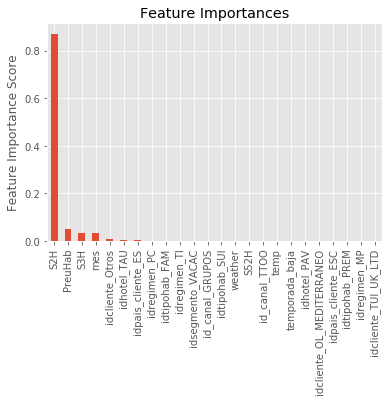

In [149]:
plot_feat_imp(tree, x_train.shape[1], features_df.columns.tolist())

# Random forest

## Hyperparameter tuning

Optimització de *max_depth*

In [401]:
params = {'max_depth': [7,8,9,10,11,12],
          'max_features': ['auto'],
          'random_state': [42],
          'n_estimators': [20]
         }

rf = RandomForestRegressor()

model = GridSearchCV(rf, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

{'max_depth': 11,
 'max_features': 'auto',
 'n_estimators': 20,
 'random_state': 42}

Optimització de *min_samples_split* i *min_samples_leaf*

In [402]:
params = {'max_depth': [11],
          'max_features': ['auto'],
          'min_samples_leaf': [1,2,3,4,5],
          'min_samples_split': [2,3,4,5,6,7],
          'n_estimators': [20],
          'random_state': [42]
         }

rf = RandomForestRegressor()

model = GridSearchCV(rf, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

{'max_depth': 11,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20,
 'random_state': 42}

*Optimització de max_features*

In [404]:
params = {'max_depth': [11],
          'max_features': ['auto', 'sqrt', 5,10,14,16,18,20,22,24,26],
          'min_samples_leaf': [1],
          'min_samples_split': [2],
          'random_state': [42],
          'n_estimators': [20]
         }

rf = RandomForestRegressor()

model = GridSearchCV(rf, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_



GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

{'max_depth': 11,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20,
 'random_state': 42}

Optimització de *n_estimators*

In [154]:
params = {'n_estimators': [1,2,5,10,16,24,32,64],
          'max_depth': [12],
          'max_features': [10],
          'min_samples_leaf': [1],
          'min_samples_split': [2],
          'random_state': [42]
         }

rf = RandomForestRegressor()

model = GridSearchCV(rf, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

{'max_depth': 12,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 32,
 'random_state': 42}

## Avaluació

Model estàndard

In [237]:
rf = RandomForestRegressor(
 random_state = 42)


In [238]:
model_scores(rf, x_train, y_train, x_test, y_test)

       Train     Test
R2    0.9957   0.9616
MSE   1.4104  13.0577
RMSE  1.1876   3.6135
MAE   0.2851   0.9201


[None]

Model amb paràmetres optimitzats

In [8]:
rf = RandomForestRegressor(ccp_alpha = 0.01,
 max_depth = 12,
 max_features = 10,
 min_samples_leaf = 2,
 min_samples_split = 2,
 min_impurity_decrease = 0.0,
 n_estimators = 20,
 random_state = 42,
 n_jobs = -1)


In [9]:
model_scores(rf, x_train, y_train, x_test, y_test)

       Train     Test
R2    0.9791   0.9609
MSE   6.7696  13.3386
RMSE  2.6018   3.6522
MAE   0.9644   1.1179


[None]

<Figure size 864x360 with 0 Axes>

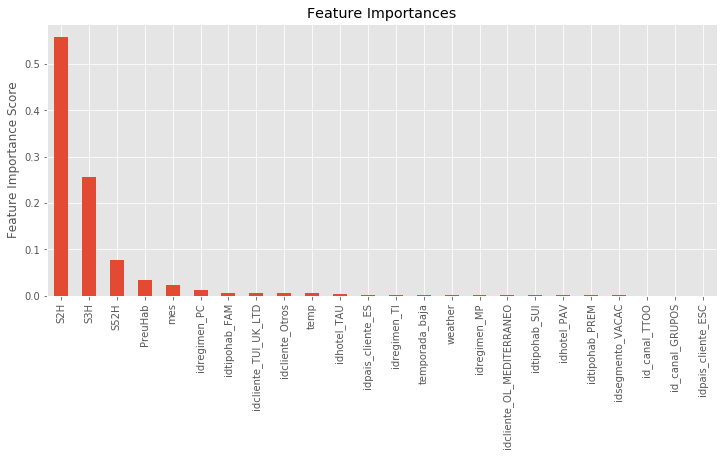

In [10]:
plt.figure(figsize = (12,5))
plot_feat_imp(rf, x_train.shape[1], features_df.columns.tolist())

# XGBoost

## Hyperparameter tuning

Optimització de *max_depth* i *min_child_weight*

In [419]:
params = {'max_depth': [8,9],
          'min_child_weight': range(1,11,2),
          'colsample_bytree': [0.7],
          'subsample': [0.7],
          'random_state': [42],
          'n_estimators': [20]
         }

xg = xgb.XGBRegressor()

model = GridSearchCV(xg, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'max_depth': [8, 9],
                         'min_child_weight': range(1, 11, 2),

{'colsample_bytree': 0.7,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 20,
 'random_state': 42,
 'subsample': 0.7}

Optimització de *gamma*

In [421]:
params = {'max_depth': [9],
          'min_child_weight': [1],
          'colsample_bytree': [0.7],
          'subsample': [0.7],
          'gamma': np.arange(0,0.1,0.01),
          'random_state': [42],
          'n_estimators': [20]
         }

xg = xgb.XGBRegressor()

model = GridSearchCV(xg, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

[16:42:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'gamma': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,

{'colsample_bytree': 0.7,
 'gamma': 0.07,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 20,
 'random_state': 42,
 'subsample': 0.7}

Optimització de *subsample* i *colsample_bytree*

In [423]:
params = {'max_depth': [9],
          'min_child_weight': [1],
          'colsample_bytree': [0.5,0.6,0.7],
          'subsample': [0.5,0.6,0.7],
          'gamma': [0.07],
          'random_state': [42],
          'n_estimators': [20]
         }

xg = xgb.XGBRegressor()

model = GridSearchCV(xg, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

[16:43:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.6, 0.7], 'gamma': [0.07],
                         'max_depth': [9], 'min_child_w

{'colsample_bytree': 0.7,
 'gamma': 0.07,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 20,
 'random_state': 42,
 'subsample': 0.6}

Optimització de *reg_alpha* i *reg_lambda*

In [424]:
params = {'max_depth': [9],
          'min_child_weight': [1],
          'colsample_bytree': [0.7],
          'subsample': [0.7],
          'gamma': [0.07],
          'reg_alpha': [0, 0.02, 0.04, 0.06, 0.08, 0.1],
          'reg_lambda': [0, 0.02, 0.04, 0.06, 0.08, 0.1],
          'random_state': [42],
          'n_estimators': [20]
         }

xg = xgb.XGBRegressor()

model = GridSearchCV(xg, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

[16:45:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'gamma': [0.07],
                         'max_depth': [9], 'min_child_weight': [1],
                         'n_estimators': [20], 'random_state': [42],
              

{'colsample_bytree': 0.7,
 'gamma': 0.07,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 20,
 'random_state': 42,
 'reg_alpha': 0.08,
 'reg_lambda': 0,
 'subsample': 0.7}

In [425]:
params = {'max_depth': [9],
          'min_child_weight': [1],
          'colsample_bytree': [0.7],
          'subsample': [0.7],
          'gamma': [0.07],
          'reg_alpha': [0.07, 0.08, 0.09],
          'reg_lambda': [0.0, 0.01],
          'random_state': [42],
          'n_estimators': [20]
         }

xg = xgb.XGBRegressor()

model = GridSearchCV(xg, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

[16:46:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'gamma': [0.07],
                         'max_depth': [9], 'min_child_weight': [1],
   

{'colsample_bytree': 0.7,
 'gamma': 0.07,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 20,
 'random_state': 42,
 'reg_alpha': 0.08,
 'reg_lambda': 0.0,
 'subsample': 0.7}

Optimització *learning_rate* i *n_estimators*

In [426]:
params = {'max_depth': [9],
          'min_child_weight': [1],
          'colsample_bytree': [0.7],
          'subsample': [0.7],
          'gamma': [0.07],
          'reg_alpha': [0.08],
          'reg_lambda': [0],
          'learning_rate': np.arange(0.00,0.35,0.05),
          'n_estimators': range(15,25,1),
          'random_state': [42]
         }

xg = xgb.XGBRegressor()

model = GridSearchCV(xg, params, cv=5, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

[16:50:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'gamma': [0.07],
                         'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
                         'max_depth': [9], 'min_child_weight': [1],
                         'n_estimators': range(15, 25

{'colsample_bytree': 0.7,
 'gamma': 0.07,
 'learning_rate': 0.2,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 24,
 'random_state': 42,
 'reg_alpha': 0.08,
 'reg_lambda': 0,
 'subsample': 0.7}

## Avaluació

Model estàndard

In [248]:
xg = xgb.XGBRegressor(
 random_state= 42,
    n_jobs=-1
 )

In [249]:
model_scores(xg, x_train, y_train, x_test, y_test)

[15:49:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
        Train     Test
R2     0.9588   0.9344
MSE   13.3217  22.2786
RMSE   3.6499   4.7200
MAE    1.1590   1.2904


[None]

Model amb paràmetres optimitzats

In [466]:
xg = xgb.XGBRegressor(random_state = 42,
                      n_jobs = -1,
                     max_depth = 9,
                     min_child_weight=1,
                     subsample = 0.6,
                     colsample_bytree=0.7,
                     reg_alpha=0.04,
                     reg_lambda=0.1,
                     learning_rate=0.1,
                     n_estimators=80)

In [467]:
model_scores(xg, x_train, y_train, x_test, y_test)

[16:53:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


       Train     Test
R2    0.9939   0.9702
MSE   2.0250  10.1622
RMSE  1.4230   3.1878
MAE   0.6646   0.9939


[None]

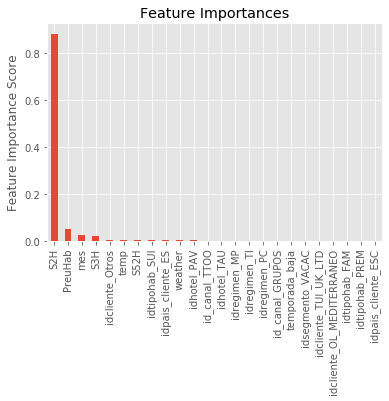

In [324]:
plot_feat_imp(tree, x_train.shape[1], features_df.columns.tolist())

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:58:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:18.248	validation_1-rmse:18.8231
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:16.4987	validation_1-rmse:17.101
[2]	validation_0-rmse:14.9819	validation_1-rmse:15.6046
[3]	validation_0-rmse:13.5636	validation_1-rmse:14.2059
[4]	validation_0-rmse:12.2747	validation_1-rmse:12.9173
[5]	validation_0-rmse:11.1326	validation_1-rmse:11.7843
[6]	validation_0-rmse:10.0768	validation_1-rmse:10.7948
[7]	validation_0-rmse:9.15475	validation_1-rmse:9.89804
[8]	validation_0-rmse:8.32471	validation_1-rmse:9.13763
[9]	validation_0-rmse:7.58151	validation_1-rmse:8.41862
[10]	validation_0-rmse:6.90821	validation_1-rmse:7.79246
[11]	validation_0-rmse:6.32172	validation_1-rmse:7.2214
[12]	validation_0-rmse:5.7704	validation_1-rmse:6.708

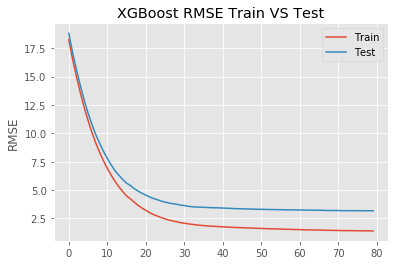

In [325]:
creating_model_XGB(xg, x_train, y_train, x_test, y_test, "rmse", 100)